In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
weight = pd.read_csv('weight-height.csv')
weight
weight.drop_duplicates(inplace=True)
weight_copy = weight.copy()
weight_copy


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
weight = weight[['Height','Weight']]
weight_copy

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
weight['weight_kg']=weight['Weight']/2.205
weight['Height_m']=weight['Height']*2.54
# weight_org = weight[['weight_kg','height_m']]
weight

,Height,Weight,weight_kg,Height_m
0,73.847017,241.893563,109.702296,187.571423
1,68.781904,162.310473,73.610192,174.706036
2,74.110105,212.740856,96.481114,188.239668
3,71.730978,220.042470,99.792504,182.196685
4,69.881796,206.349801,93.582676,177.499761
...,...,...,...,...
9995,66.172652,136.777454,62.030591,168.078536
9996,67.067155,170.867906,77.491114,170.350573
9997,63.867992,128.475319,58.265451,162.224700
9998,69.034243,163.852461,74.309506,175.346978


In [6]:
weight.drop(['Weight','Height'],axis=1,inplace=True)
weight

,weight_kg,Height_m
0,109.702296,187.571423
1,73.610192,174.706036
2,96.481114,188.239668
3,99.792504,182.196685
4,93.582676,177.499761
...,...,...
9995,62.030591,168.078536
9996,77.491114,170.350573
9997,58.265451,162.224700
9998,74.309506,175.346978


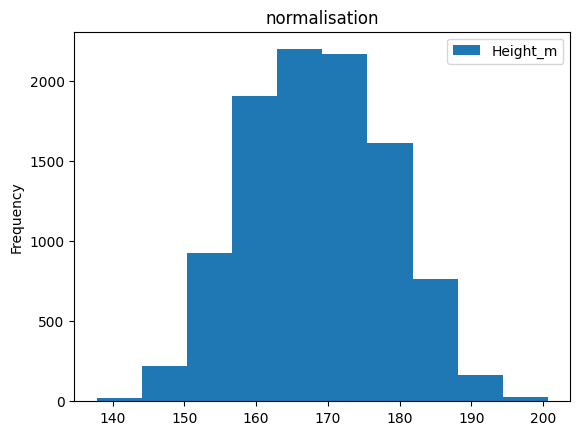

In [7]:
#assumtion 1 : check nomalisation
weight.plot(kind='hist',x='weight_kg')
plt.title("normalisation")
plt.show()

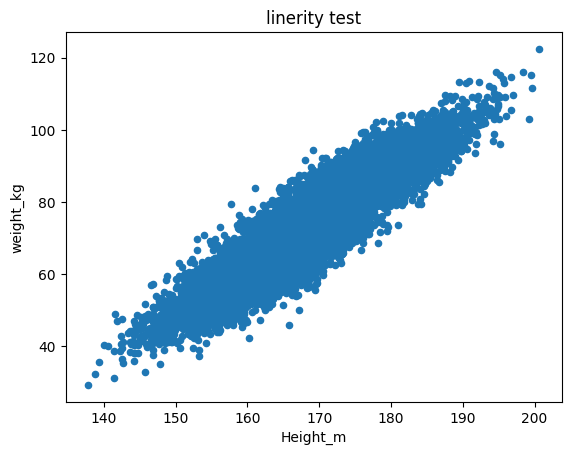

In [8]:
#linerity test
weight.plot(kind="scatter",x='Height_m',y='weight_kg')
plt.title("linerity test")
plt.show()

In [9]:
#multicollinearity
weight.corr()

,weight_kg,Height_m
weight_kg,1.000000,0.924756
Height_m,0.924756,1.000000



*   assumption 4 : no auto regression
*   assumption 5 : homoscedasticity test
*   assumption 6 : Zero residual mean test


In [10]:
#model building
from sklearn.linear_model import LinearRegression
X=weight[['weight_kg']]
y=weight['Height_m']

In [11]:
#model training
linear_model = LinearRegression()
linear_model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
linear_model.coef_

array([0.62062922])

In [13]:
linear_model.intercept_

np.float64(123.13387264001608)

In [14]:
#7.model testing
test_data =pd.DataFrame([80,90,100])

y_pred=linear_model.predict(test_data)
y_pred

c:\Users\Yasin\OneDrive\Desktop\supervised_learning\Supervised-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([172.78421024, 178.99050245, 185.19679465])

In [15]:
y_pred=linear_model.predict(X)
error = y - y_pred
error

0      -3.646900
1       5.887528
2       5.226797
3      -2.871331
4      -3.714254
          ...   
9995    6.446666
9996   -0.876549
9997    2.929586
9998    6.094454
9999    2.216324
Name: Height_m, Length: 10000, dtype: float64

In [16]:
error.mean()

np.float64(1.6643753042444587e-14)

**lets check assumption**

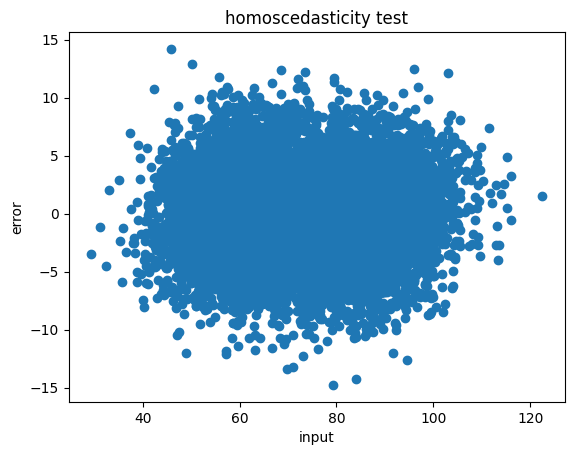

In [17]:
#assumption 5 : homoscedasticity test

plt.scatter(x=X,y=error)
plt.xlabel('input')
plt.ylabel('error')
plt.title('homoscedasticity test')
plt.show()

**assumption 6 : Zero residual mean test**

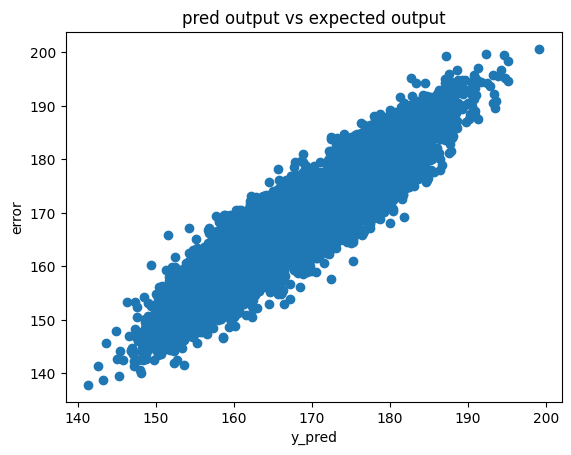

In [18]:
plt.scatter(x=y_pred,y=y)
plt.xlabel('y_pred')
plt.ylabel('error')
plt.title('pred output vs expected output')
plt.show()

**model deployment**

In [19]:
from pickle import dump
dump(linear_model,open('weght_height_model.pkl','wb'))

In [20]:
# load the model
from pickle import load

In [21]:
loaded_weight_height_model = load(open('weght_height_model.pkl','rb'))
loaded_weight_height_model.predict(X)

array([191.21832319, 168.81850845, 183.01287094, ..., 159.29511386,
       169.25252357, 155.12206037], shape=(10000,))

## **logistic** test

**import weight-height.csv**

In [22]:
import pandas as pd

In [23]:
weight_height = pd.read_csv('weight-height.csv')
weight_height.isnull().sum()
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
# weight_height['Height']=weight_height['Height']*2.54
# weight_height['Weight']=weight_height['Weight']/2.205
# weight_height

weight_height['weight_kg']=weight_height['Weight']/2.205
weight_height['Height_m']=weight_height['Height']*2.54
weight_height

,Gender,Height,Weight,weight_kg,Height_m
0,Male,73.847017,241.893563,109.702296,187.571423
1,Male,68.781904,162.310473,73.610192,174.706036
2,Male,74.110105,212.740856,96.481114,188.239668
3,Male,71.730978,220.042470,99.792504,182.196685
4,Male,69.881796,206.349801,93.582676,177.499761
...,...,...,...,...,...
9995,Female,66.172652,136.777454,62.030591,168.078536
9996,Female,67.067155,170.867906,77.491114,170.350573
9997,Female,63.867992,128.475319,58.265451,162.224700
9998,Female,69.034243,163.852461,74.309506,175.346978


In [25]:
weight_height.drop(['Weight','Height'],axis=1,inplace=True)
weight_height


,Gender,weight_kg,Height_m
0,Male,109.702296,187.571423
1,Male,73.610192,174.706036
2,Male,96.481114,188.239668
3,Male,99.792504,182.196685
4,Male,93.582676,177.499761
...,...,...,...
9995,Female,62.030591,168.078536
9996,Female,77.491114,170.350573
9997,Female,58.265451,162.224700
9998,Female,74.309506,175.346978


In [44]:
weight_height['Gender'].replace({'Male':1,'Female':0},inplace=True)
weight_height

C:\Users\Yasin\AppData\Local\Temp\ipykernel_17152\1994817682.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  weight_height['Gender'].replace({'Male':1,'Female':0},inplace=True)


,Gender,weight_kg,Height_m
0,Male,109.702296,187.571423
1,Male,73.610192,174.706036
2,Male,96.481114,188.239668
3,Male,99.792504,182.196685
4,Male,93.582676,177.499761
...,...,...,...
9995,Female,62.030591,168.078536
9996,Female,77.491114,170.350573
9997,Female,58.265451,162.224700
9998,Female,74.309506,175.346978


In [41]:
X=weight_height.drop('Gender',axis=1)
y=weight_height['Gender']

In [43]:
y

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
9995    Female
9996    Female
9997    Female
9998    Female
9999    Female
Name: Gender, Length: 10000, dtype: str

In [28]:
#import logistic reg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [29]:
logestic_reg=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
logestic_reg.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [30]:
prediction = logestic_reg.predict(X_train)
prediction
# weight_height['prediction']= pd.DataFrame(prediction)
# # weight_height

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Female'],
      shape=(8000,), dtype=object)

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_train,prediction)

0.91825